In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

- **GAME_ID**: Unique Identifier of the Game  
- **TEAM_ID**: Unique Identifier of the Team. For each GAME_ID there are only two TEAM_IDs.  
- **TEAM_ABBREVIATION**: Abbreviation of the Team (e.g., GSW - Golden State Warriors)  
- **TEAM_CITY**: City of the Team  
- **PLAYER_ID**: Unique Identifier of the Player  
- **PLAYER_NAME**: Complete Name (First and Last Name) of the Player who played the game  
- **NICKNAME**: Nickname of the Player who played the game  
- **START_POSITION**: Position in which the player started the game (If populated, the player started the game)  
- **COMMENT**: Additional comments  
- **MIN**: Number of minutes the player played in the game  
- **FGM**: Number of Field Goals (both 2 and 3 Points) made by the player in the game  
- **FGA**: Number of Field Goals (both 2 and 3 Points) attempted by the player in the game  
- **FG_PCT**: Field Goal percentage (both 2 and 3 Points) by the player in the game  
- **FG3M**: Number of 3-Point Field Goals made by the player in the game  
- **FG3A**: Number of 3-Point Field Goals attempted by the player in the game  
- **FG3_PCT**: 3-Point Field Goal percentage by the player in the game  
- **FTM**: Number of Free Throws made by the player in the game  
- **FTA**: Number of Free Throws attempted by the player in the game  
- **FT_PCT**: Free Throw percentage by the player in the game  
- **OREB**: Number of Offensive Rebounds by the player in the game  
- **DREB**: Number of Defensive Rebounds by the player in the game  
- **REB**: Total Rebounds (Offensive + Defensive) by the player in the game  
- **AST**: Number of Assists by the player in the game  
- **STL**: Number of Steals by the player in the game  
- **BLK**: Number of Blocks by the player in the game  
- **TO**: Number of Turnovers by the player in the game  
- **PF**: Number of Personal Fouls by the player in the game  
- **PTS**: Number of Points scored by the player in the game  
- **PLUS_MINUS**: Plus/Minus statistic for the player in the game  


In [4]:
df = pd.read_csv('NBA_DATASET.csv')

In [5]:
df.shape

(736, 30)

In [6]:
df.isnull().sum()

Unnamed: 0             0
GAME_ID                0
TEAM_ID                0
TEAM_ABBREVIATION      0
TEAM_CITY              0
PLAYER_ID              0
PLAYER_NAME            0
NICKNAME               0
START_POSITION       476
COMMENT              606
MIN                  130
FGM                  130
FGA                  130
FG_PCT               130
FG3M                 130
FG3A                 130
FG3_PCT              130
FTM                  130
FTA                  130
FT_PCT               130
OREB                 130
DREB                 130
REB                  130
AST                  130
STL                  130
BLK                  130
TO                   130
PF                   130
PTS                  130
PLUS_MINUS           130
dtype: int64

In [ ]:
df['START_POSITION'] = df['START_POSITION'].fillna('0')

player_stats = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
                'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
                'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']

df = df.dropna(subset=player_stats, how='all')

df.drop(columns=['COMMENT'], inplace=True)


In [8]:
df.isnull().sum()

Unnamed: 0           0
GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_CITY            0
PLAYER_ID            0
PLAYER_NAME          0
NICKNAME             0
START_POSITION       0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

In [9]:
df.shape

(606, 29)

In [ ]:
df['MIN'] = df['MIN'].astype(str).apply(
    lambda x: round(float(x.split(':')[0]) + int(x.split(':')[1]) / 60, 2) if ':' in x else float(x)
)


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

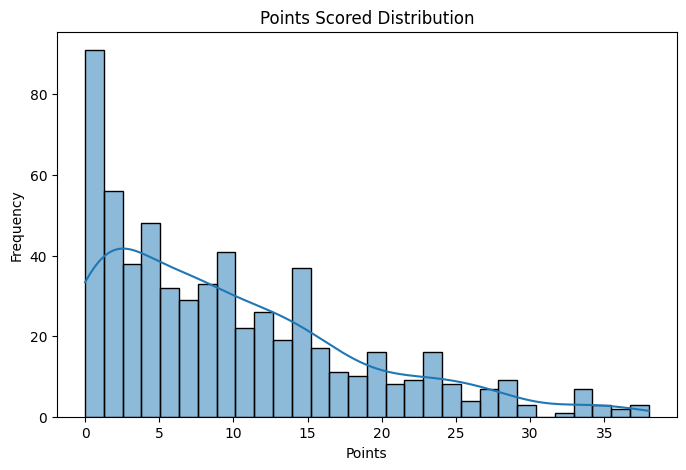

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['PTS'], bins=30, kde=True)
plt.title('Points Scored Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

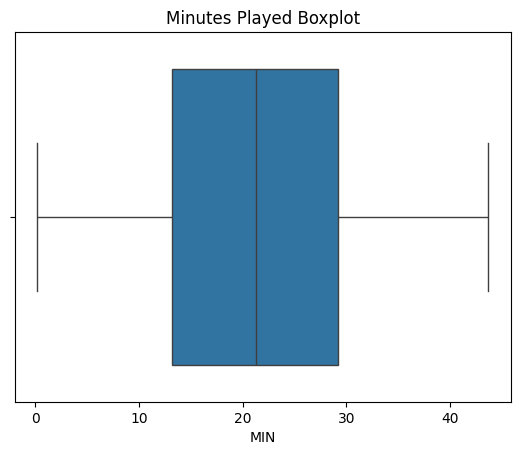

In [13]:
sns.boxplot(x=df['MIN'])
plt.title("Minutes Played Boxplot")
plt.show()


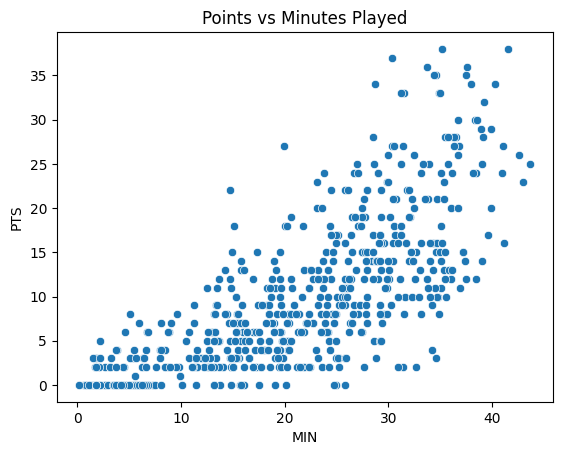

In [14]:
sns.scatterplot(x='MIN', y='PTS', data=df)
plt.title("Points vs Minutes Played")
plt.show()


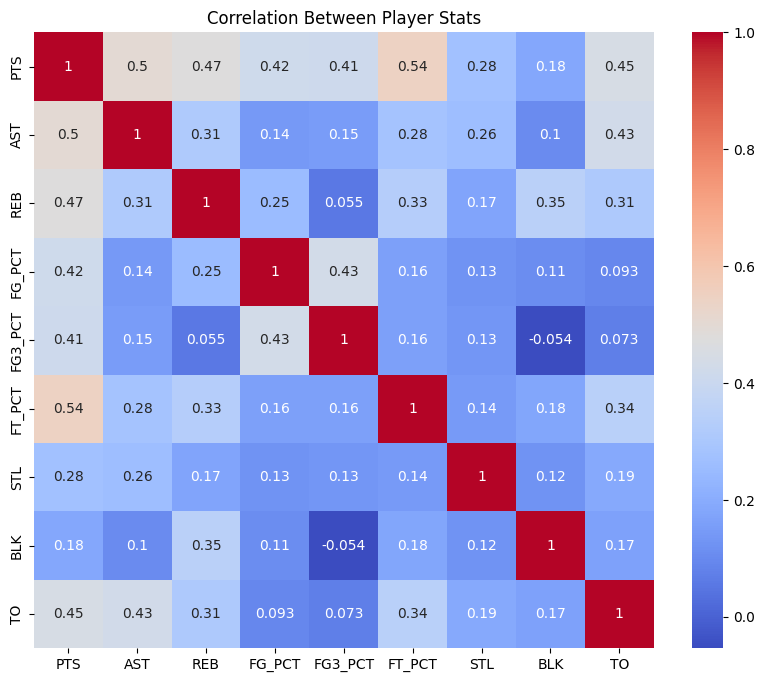

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['PTS','AST','REB','FG_PCT','FG3_PCT','FT_PCT','STL','BLK','TO']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Player Stats")
plt.show()


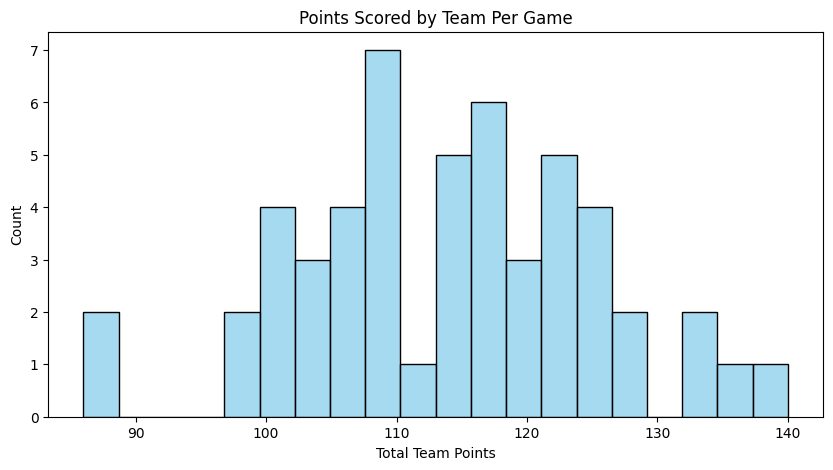

In [16]:
team_scores = df.groupby(['GAME_ID', 'TEAM_ABBREVIATION'])['PTS'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.histplot(team_scores['PTS'], bins=20, color='skyblue')
plt.title('Points Scored by Team Per Game')
plt.xlabel('Total Team Points')
plt.show()


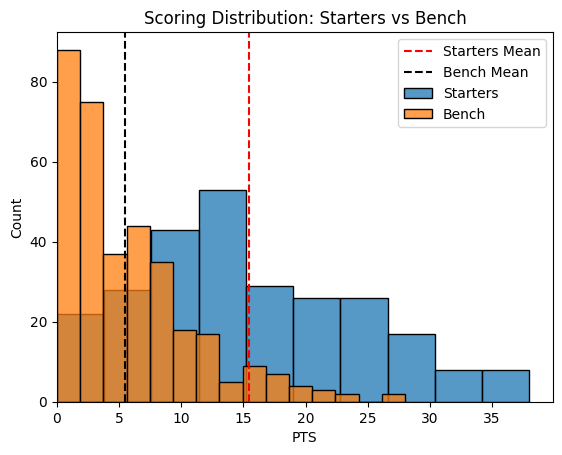

In [17]:
df['IS_STARTER'] = df['START_POSITION'].apply(lambda x: 0 if x in [0, '', '0'] else 1)

starters = df[df['IS_STARTER'] == 1]
bench = df[df['IS_STARTER'] == 0]

sns.histplot(starters['PTS'], label='Starters')
sns.histplot(bench['PTS'], label='Bench')
plt.title("Scoring Distribution: Starters vs Bench")
plt.axvline(starters['PTS'].mean(), color='red', linestyle='--', label='Starters Mean')
plt.axvline(bench['PTS'].mean(), color='black', linestyle='--', label='Bench Mean')
plt.xlim(0, None)
plt.legend()
plt.show()


In [ ]:
print("Bench PTS Summary:")
print(bench['PTS'].describe())

print("\nNumber of non-zero bench scores:", (bench['PTS'] > 0).sum())


Bench PTS Summary:
count    346.000000
mean       5.505780
std        5.535783
min        0.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       28.000000
Name: PTS, dtype: float64

Number of non-zero bench scores: 260


In [ ]:
top_scores = df.sort_values(by='PTS', ascending=False).head(10)


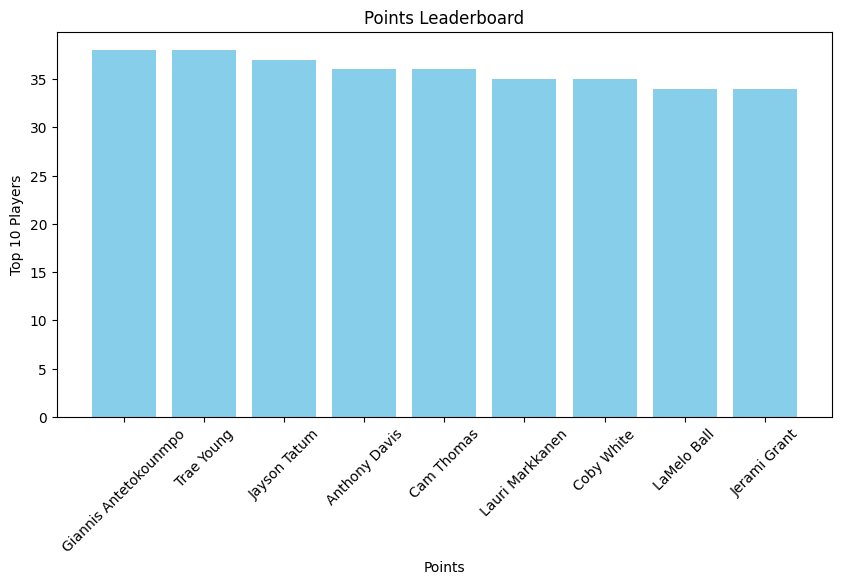

In [20]:
plt.figure(figsize=(10,5))
plt.bar(top_scores['PLAYER_NAME'],top_scores['PTS'], color='skyblue')
plt.title('Points Leaderboard')
plt.xlabel('Points')
plt.ylabel('Top 10 Players')
plt.xticks(rotation=45)  
plt.show()

In [21]:
top_avg = df.groupby('PLAYER_NAME')[['PTS','AST','REB']].mean().sort_values(by='PTS', ascending=False).head(10)

In [ ]:
# Efficiency score 
df['EFF'] = df['PTS'] + df['REB'] + df['AST'] + df['STL'] + df['BLK'] - (df['FGA'] - df['FGM']) - (df['FTA'] - df['FTM']) - df['TO']

# Top 10 Efficient Players
top_eff = df.groupby('PLAYER_NAME')['EFF'].mean().sort_values(ascending=False).head(10)


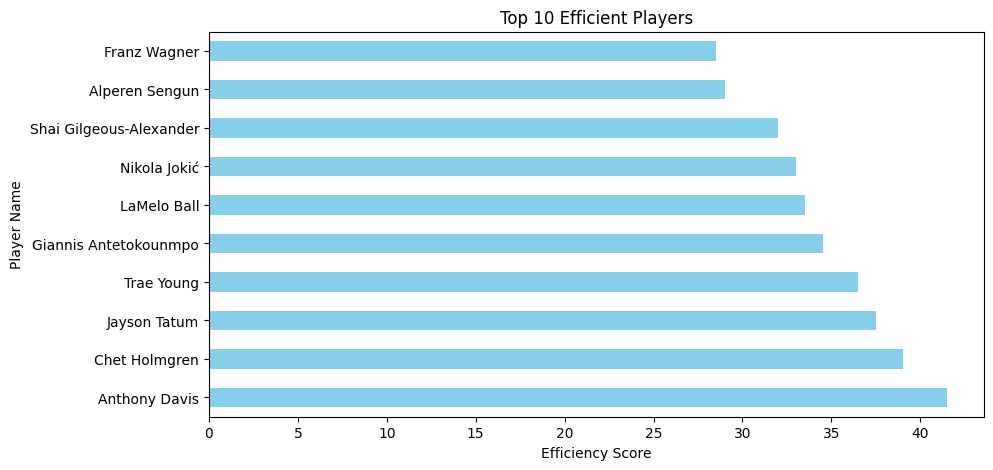

In [38]:
plt.figure(figsize=(10,5))
top_eff.plot(kind='barh', color='skyblue')
plt.xlabel('Efficiency Score')
plt.ylabel('Player Name')
plt.title('Top 10 Efficient Players')
plt.show()


In [24]:
# FREE THORWS IS GIVEN LESS WORTH, MULIPLIED BY 2 TO GET EFFICIENCY 1
denominator = 2 * (df['FGA'] + 0.44 * df['FTA']) #MULTIPLIED BY 0.44, AS NOT FT LEAD TO POSSESION

# IF PLAYER HAS NOT FT, DENOMINATOR BECOMES 0
df['TS_PCT'] = df['PTS'] / denominator
df.loc[denominator == 0, 'TS_PCT'] = 0 

#TS VALUE SHOULD BE BETWEEN 0 AND 1
df = df[(df['TS_PCT'] >= 0) & (df['TS_PCT'] <= 1)]

print(df[['PTS', 'FGA', 'FTA', 'TS_PCT']].head())

    PTS   FGA  FTA    TS_PCT
0   4.0   7.0  2.0  0.253807
1  12.0   6.0  6.0  0.694444
2  12.0   9.0  1.0  0.635593
3  16.0  13.0  1.0  0.595238
4  22.0  14.0  3.0  0.718016


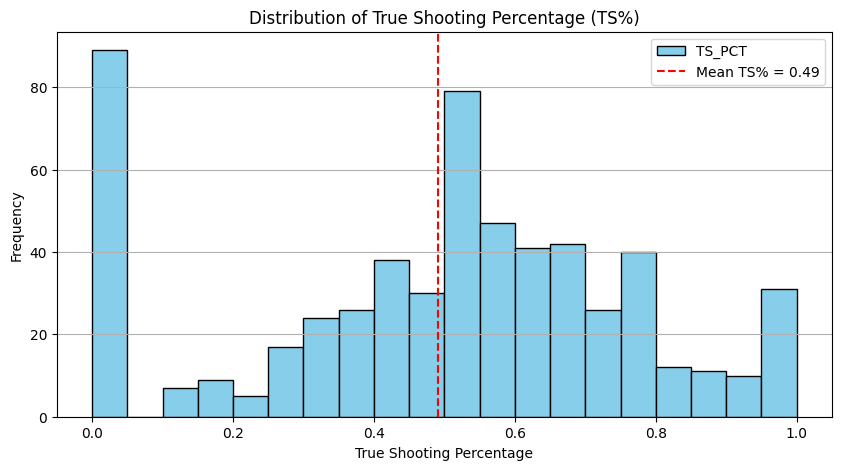

In [25]:
plt.figure(figsize=(10,5))
df['TS_PCT'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of True Shooting Percentage (TS%)')
plt.xlabel('True Shooting Percentage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='-')
plt.axvline(df['TS_PCT'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean TS% = {df["TS_PCT"].mean():.2f}')
plt.legend()
plt.show()


In [ ]:
# NORMALIZING THE FEATURES
scaler = MinMaxScaler()
df[['EFF_scaled', 'TS_PCT_scaled', 'MIN_scaled']] = scaler.fit_transform(df[['EFF', 'TS_PCT', 'MIN']])

weight_eff = 0.4
weight_ts = 0.3
weight_min = 0.3

df['IMPACT_SCORE'] = (
    weight_eff * df['EFF_scaled'] +
    weight_ts * df['TS_PCT_scaled'] +
    weight_min * df['MIN_scaled']
)


In [27]:
player_impact_avg = (
    df.groupby('PLAYER_NAME')['IMPACT_SCORE']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
player_impact_avg = player_impact_avg.sort_values(by='IMPACT_SCORE')


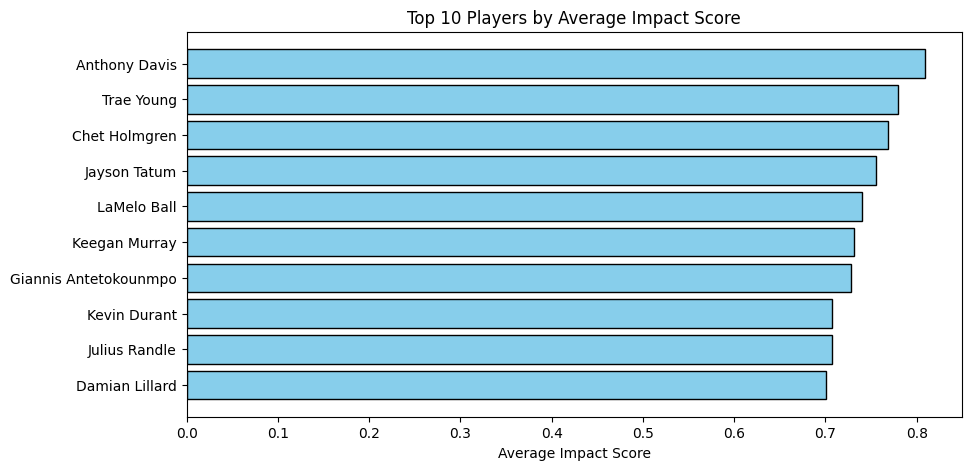

In [28]:
plt.figure(figsize=(10, 5))
plt.barh(player_impact_avg['PLAYER_NAME'], player_impact_avg['IMPACT_SCORE'], color='skyblue', edgecolor='black')
plt.xlabel("Average Impact Score")
plt.title("Top 10 Players by Average Impact Score")

plt.show()

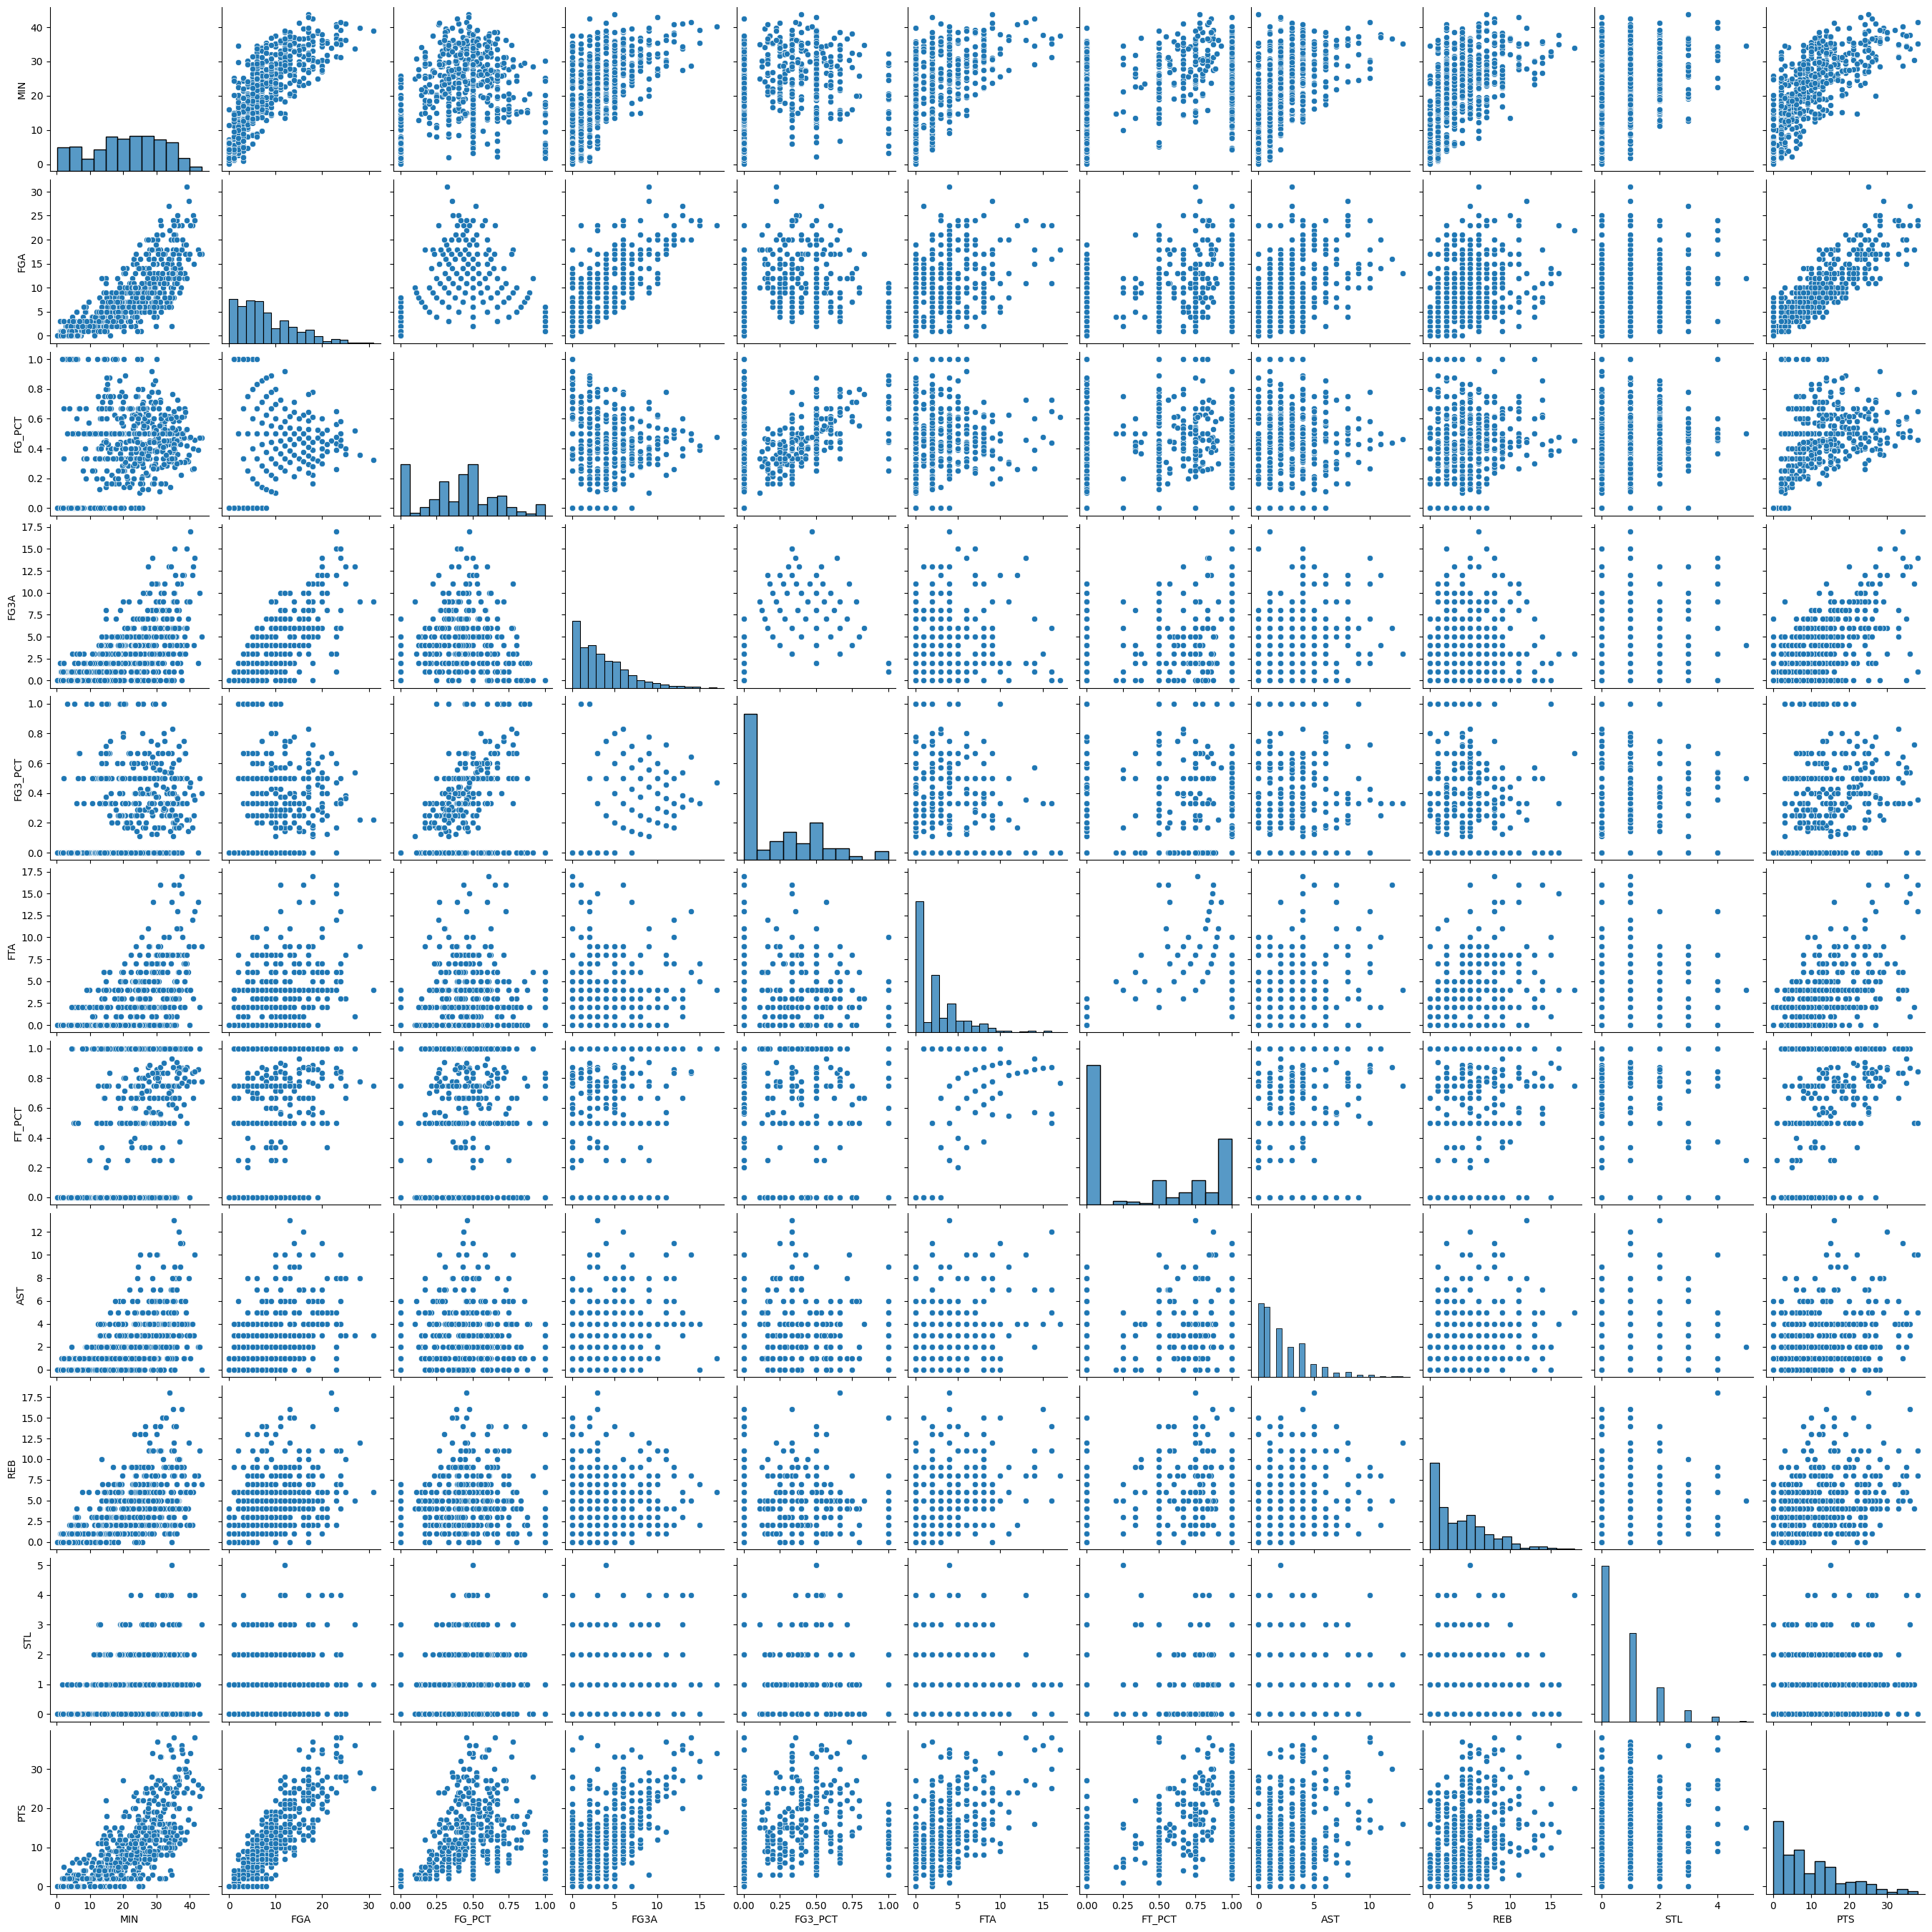

              MIN       FGA    FG_PCT      FG3A   FG3_PCT       FTA    FT_PCT  \
MIN      1.000000  0.795739  0.341716  0.608341  0.333751  0.552302  0.520272   
FGA      0.795739  1.000000  0.245798  0.766187  0.343227  0.533652  0.484345   
FG_PCT   0.341716  0.245798  1.000000  0.079787  0.346404  0.206816  0.199762   
FG3A     0.608341  0.766187  0.079787  1.000000  0.432474  0.226101  0.343118   
FG3_PCT  0.333751  0.343227  0.346404  0.432474  1.000000  0.101579  0.201296   
FTA      0.552302  0.533652  0.206816  0.226101  0.101579  1.000000  0.612944   
FT_PCT   0.520272  0.484345  0.199762  0.343118  0.201296  0.612944  1.000000   
AST      0.568971  0.525559  0.175992  0.378318  0.195114  0.403941  0.294365   
REB      0.572900  0.458507  0.283349  0.156542  0.086122  0.466906  0.341054   
STL      0.355508  0.285006  0.154201  0.236512  0.172797  0.123881  0.150540   
PTS      0.751136  0.889992  0.463247  0.660132  0.470804  0.663437  0.569512   

              AST       REB

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check distributions of features
player_stats = ['MIN', 'FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'AST', 'REB', 'STL', 'PTS']
sns.pairplot(df[player_stats])
plt.show()

# Check correlations to see if any features have significantly different scales
print(df[player_stats].corr())


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[player_stats[:-1]])

scaled_df = pd.DataFrame(scaled_features, columns=player_stats[:-1])
df_scaled = df.copy()   
df_scaled[player_stats[:-1]] = scaled_df

print(df_scaled.head())


    GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
0  22400061  1610612752               NYK  New York    1628384   
1  22400061  1610612752               NYK  New York    1628404   
2  22400061  1610612752               NYK  New York    1626157   
3  22400061  1610612752               NYK  New York    1628969   
4  22400061  1610612752               NYK  New York    1628973   

          PLAYER_NAME      NICKNAME START_POSITION       MIN  FGM  ...   PF  \
0          OG Anunoby            OG              F  1.226189  1.0  ...  3.0   
1           Josh Hart          Josh              F  0.327903  4.0  ...  0.0   
2  Karl-Anthony Towns  Karl-Anthony              C  0.246157  5.0  ...  1.0   
3       Mikal Bridges         Mikal              G  1.267991  7.0  ...  0.0   
4       Jalen Brunson         Jalen              G  0.327903  9.0  ...  3.0   

    PTS  PLUS_MINUS  IS_STARTER   EFF    TS_PCT  EFF_scaled  TS_PCT_scaled  \
0   4.0       -21.0           1   7.0  0.253807   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

player_stats = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
                'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
                'STL', 'BLK', 'TO', 'PF', 'PLUS_MINUS']

leakage_cols = ['FGM', 'FG3M', 'FTM']

clean_features = [col for col in player_stats if col not in leakage_cols]

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[clean_features] = scaler.fit_transform(df_scaled[clean_features])

X = df_scaled[clean_features]
y = df_scaled['PTS']

X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Linear Regression → RMSE: {rmse_lr:.3f}, R²: {r2_lr:.3f}")
print(f"Random Forest     → RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")
print(f"XGBoost           → RMSE: {rmse_xgb:.3f}, R²: {r2_xgb:.3f}")


Linear Regression → RMSE: 2.409, R²: 0.926
Random Forest     → RMSE: 1.895, R²: 0.954
XGBoost           → RMSE: 1.543, R²: 0.970


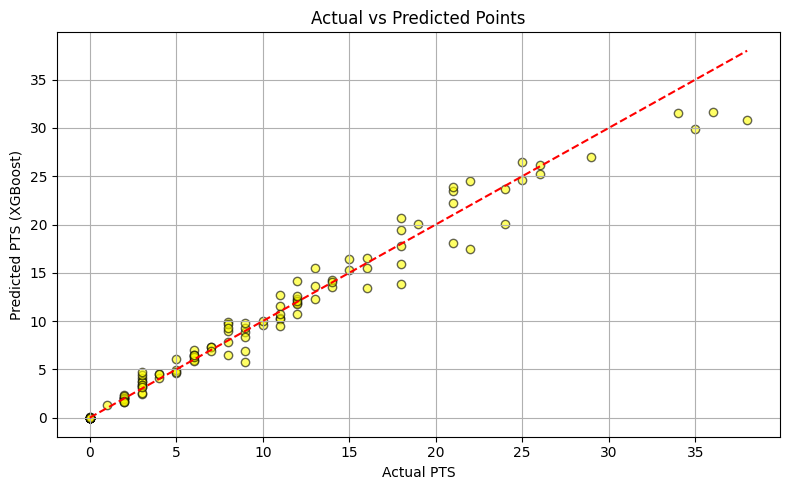

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='YELLOW', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual PTS")
plt.ylabel("Predicted PTS (XGBoost)")
plt.title("Actual vs Predicted Points")
plt.grid(True)
plt.tight_layout()
plt.show()


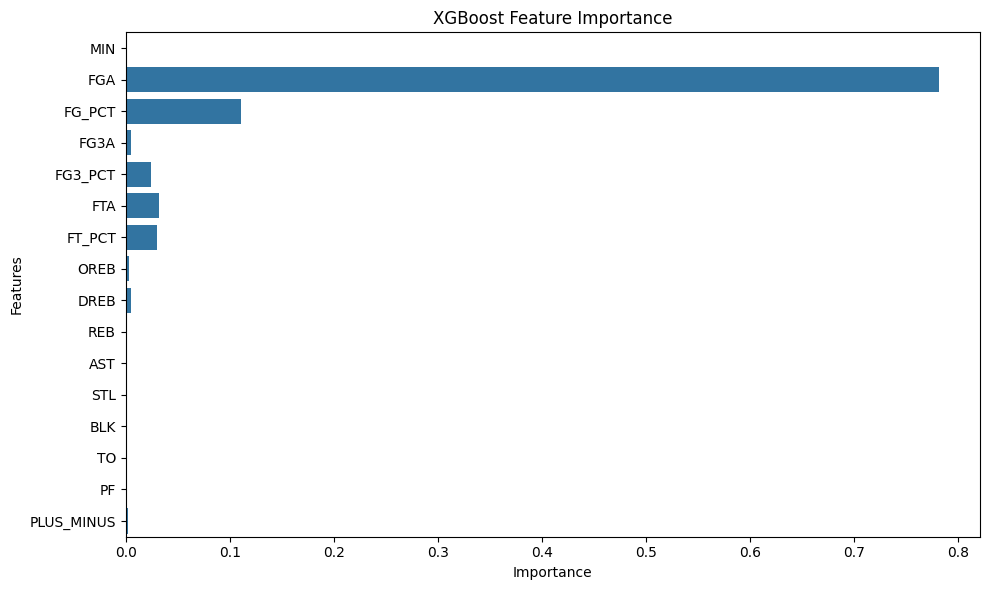

In [33]:
importances = xgb.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
